In [1]:
# For data manipulation
import numpy as np 
import pandas as pd 

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Ingore the warnings
import warnings
warnings.filterwarnings('ignore')

# DL Libraries
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import image_dataset_from_directory

# Other libraries
import os
import random

In [2]:
def preprocess_image(image, label):
    # 將圖像轉換為灰階
    image = tensorflow.image.rgb_to_grayscale(image)
    # 將圖像轉換為float32類型
    image = tensorflow.cast(image, tensorflow.float32) / 255.0  # 歸一化到[0, 1]
    return image, label

In [3]:
# Load the image dataset from the directory using utils
# ds = image_dataset_from_directory('E:\DataScience Codanics\Kaggle\LAPTOP Items classification\PC Part Classification\Data')
def preprocess_image(image, label):
    # 將圖像轉換為灰階
    image = tensorflow.image.rgb_to_grayscale(image)
    return image, label

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'archive/train_data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = 'archive/test_data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

# Extrating the class labels
classes = train_ds.class_names

train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)

Found 198 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


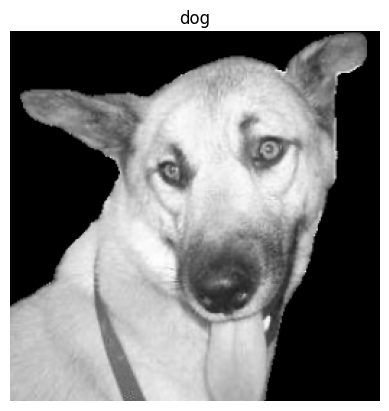

In [4]:
for image, label in train_ds.take(1):
    plt.imshow(tensorflow.squeeze(image[0]), cmap='gray')
    plt.title(classes[label[0].numpy()])
    plt.axis('off')
    plt.show()

In [5]:
# Creating a function to visualize the images

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

CAT


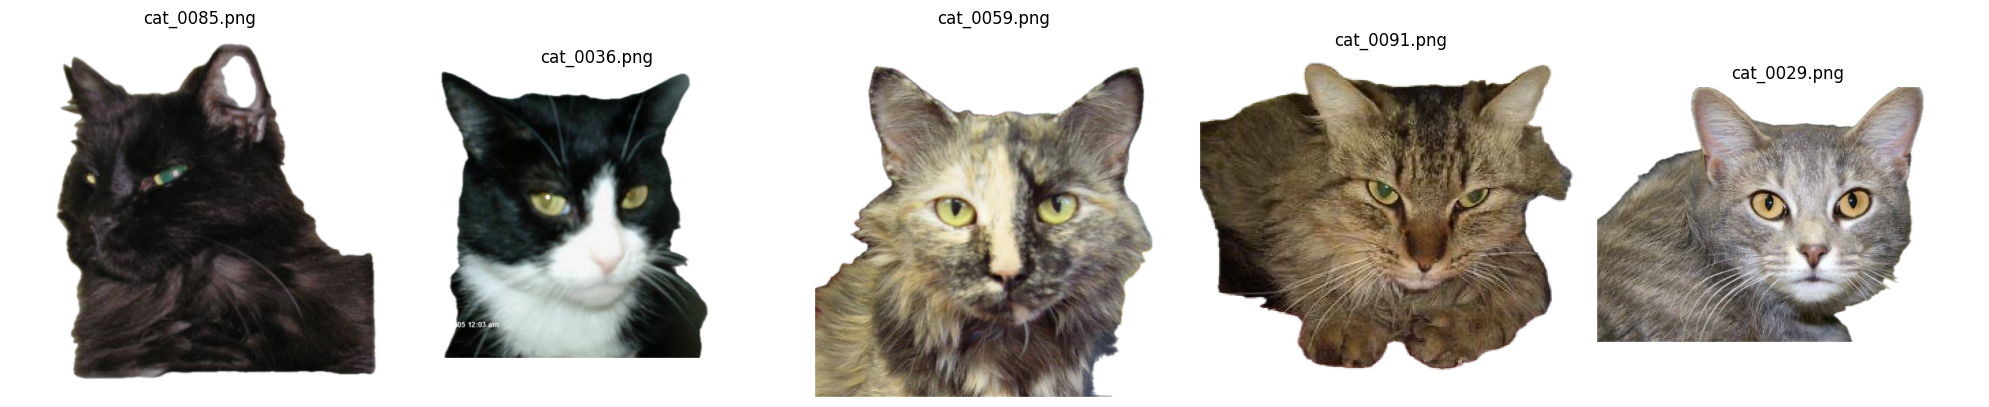

DOG


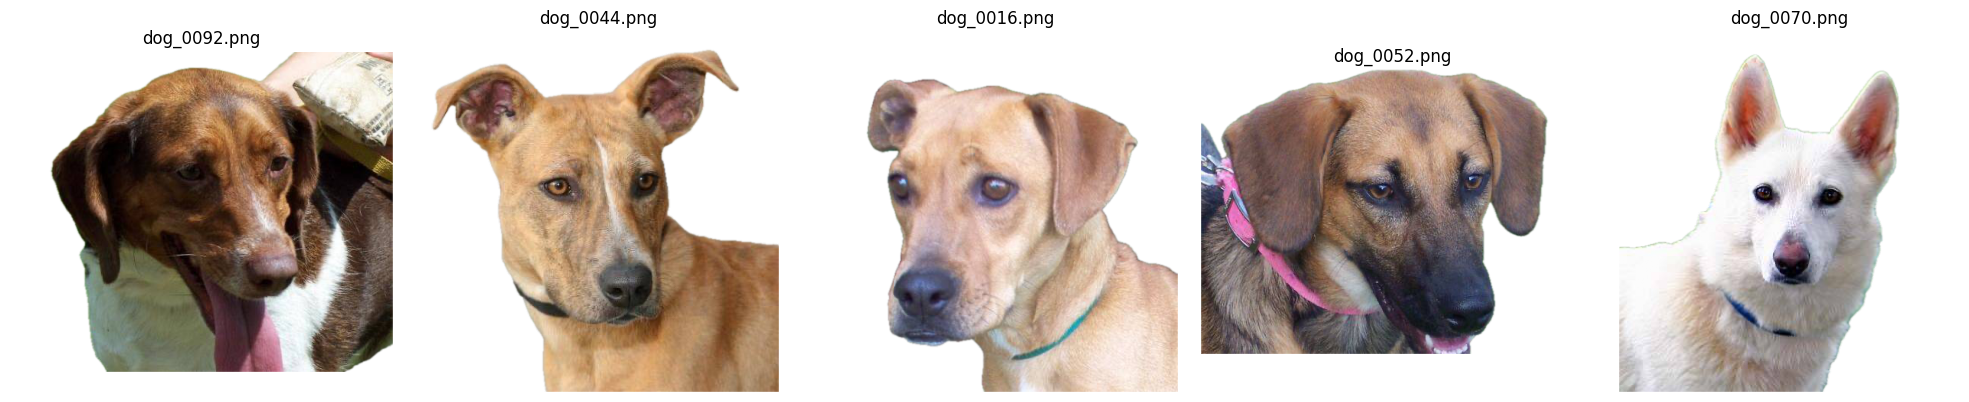

In [6]:
# Iterating through each class to plot its images
for label in classes:
    
    # Specify the path containing the images to visualize
    path_to_visualize = f"archive/train_data/{label}"

    # Visualize 5 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=5)

In [9]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
Dropout(0.5)

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
Dropout(0.5)
model.add(Dense(32, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 128)              

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model

history = model.fit(train_ds, epochs=10, validation_data=val_ds, verbose=1)

Epoch 1/10
7/7 [==============================] - 27s 4s/step - loss: 260.2880 - accuracy: 0.4747 - val_loss: 4.9753 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 26s 4s/step - loss: 1.3339 - accuracy: 0.7677 - val_loss: 0.8161 - val_accuracy: 0.5750
Epoch 3/10
7/7 [==============================] - 25s 3s/step - loss: 0.1750 - accuracy: 0.9343 - val_loss: 0.7364 - val_accuracy: 0.7250
Epoch 4/10
7/7 [==============================] - 27s 4s/step - loss: 0.0256 - accuracy: 0.9949 - val_loss: 0.8663 - val_accuracy: 0.7750
Epoch 5/10
7/7 [==============================] - 27s 4s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.0058 - val_accuracy: 0.7750
Epoch 6/10
7/7 [==============================] - 25s 3s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.2615 - val_accuracy: 0.7500
Epoch 7/10
7/7 [==============================] - 25s 3s/step - loss: 3.6640e-04 - accuracy: 1.0000 - val_loss: 1.8775 - val_accuracy: 0.6500
Epoch 8/10
7/7 [============

In [13]:
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = "data\\train_data\\cat\\cat.914.jpg"

def preprocess_image(img_path):
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)  # 將圖像轉換為灰階
    img_array = np.expand_dims(img_array, axis=-1)  # 添加一個通道維度
    img_array = np.expand_dims(img_array, axis=0)  # 添加一個批次維度
    img_array /= 255.0  # 歸一化
    return img_array

# 預測圖像類別
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    return predictions

# 顯示預測結果
def display_prediction(img_path):
    predictions = predict_image(img_path)
    # 使用 argmax 獲取預測類別索引
    predicted_class = classes[int(predictions[0] > 0.5)]
    img = load_img(img_path)
    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}')
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 45ms/step


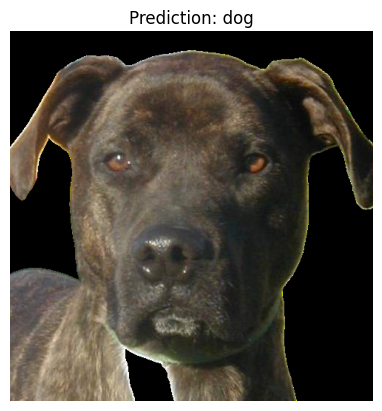

1/1 [==============================] - 0s 92ms/step
[[0.5139834]]


In [15]:
import cv2
img_path = "archive/test_data/dog/dog_1017.png"

display_prediction(img_path)

print(model.predict(preprocess_image(img_path)))

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt



Found 198 files belonging to 2 classes.
1/1 [==============================] - 0s 152ms/step
              precision    recall  f1-score   support

         dog       1.00      1.00      1.00        99
         cat       1.00      1.00      1.00        99

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



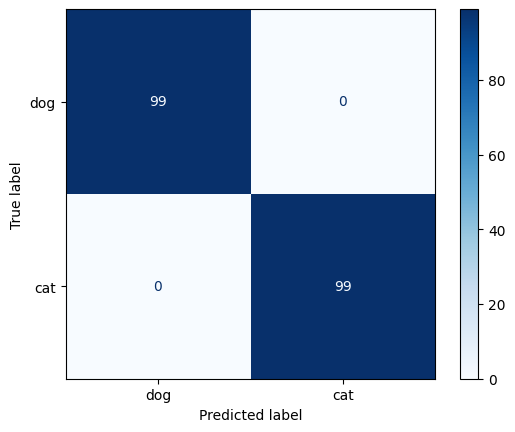

In [19]:

# 类别列表
classes = ['dog', 'cat']  # 根据你的模型类别替换

test_dataset = image_dataset_from_directory(
    directory = 'archive/train_data',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),  # 调整为与你的模型输入大小一致
    batch_size=32,
    color_mode='grayscale'  # 假设是灰度图像
)

# 获取图像和标签
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype(int).flatten()  # 假设二分类
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
print(classification_report(y_true,y_pred, target_names=classes))
plt.show()